In [19]:
# DATS 6103 – Individual Project 1 - Max Grossman
    # Description: Describe top 15 countries' military spending as compared between 
    #              countries and other indicators of interest (specifically gdp & population)
    #
    # Data Source: World Bank DataBank and SIPRI via World Bank DataBank

In [1]:
### Dependencies ###
import pandas as pd
import matplotlib.pyplot as pp
import matplotlib.ticker as mtick
import numpy as np
import os

# allow for inline plots
%matplotlib inline

### Set to correct working directory ###

# if data folder not in current directory, ask user to provide
if("/mili_data" in [x[0].split('militaries')[1] for x in os.walk(os.getcwd())]):
    pass
else:
    neededDirectory = input("Provide directory with data: ")
    os.chdir(neededDirectory)

In [8]:
### Step 1: Clean and Organize the datasets ###

# The code below completes the following steps
    # 1. read in data
    # 2. group in list
    # 3. remove uneeded columns and rename year columns
    # 4. subset dataframes in list to only top 15 countries in terms of military spending 
    # 5. subset dataframes to only include columns 2007 to 2015
    
    
# 1. read in data from /mili_data folder
militarySpending = pd.read_csv("mili_data/militarySpending.csv",delimiter='\t')
population = pd.read_csv ("mili_data/population.csv")
gdpUSD = pd.read_csv('mili_data/gdp_usd.csv')

In [9]:
# 2. add dataframes to list
miliDataList = [militarySpending,population,gdpUSD]

In [10]:
# 3. clean dataframes

#use for loop to remove specific column names in population and militarySpending
for i in range(0,len(miliDataList)):
    
    #set index to Country Codes
    miliDataList[i] = miliDataList[i].set_index('Country Name')
    miliDataList[i].index.name = None
    miliDataList[i] = miliDataList[i].sort_index(axis=1)
    
    #convert militarySpending to float, also set militarySpending ix names equal to those in population and gdpUSD
    if(i==0):
        
        miliDataList[i] = miliDataList[i].rename(index = {
            "USA":"United States",
            "China, P.R.":"China",
            "USSR/Russia":"Russian Federation",
            "UK": "United Kingdom",
            "Korea, South":"Korea, Rep."
        })
        
    if(i>0):
    
        #generate seriesCode, a list of column names that include the word series as well as "Country Code"
        seriesCode = [s for s in list(miliDataList[i]) if "Series".lower() in s.lower()]
        seriesCode.extend([s for s in list(miliDataList[i]) if "Country".lower() in s.lower()])

        #drop columns in seriesCode list
        miliDataList[i] = miliDataList[i].drop(seriesCode,axis=1)
    
        #generate newColumns, list with 'Country Name' and column names w/o [YR####] text provided in original dataset 
        newColumns = [s.split(" [")[0] for s in list(miliDataList[i]) if "YR".lower() in s.lower()]
    
        #set current data frame columns to those in newColumns
        miliDataList[i].columns = newColumns
            
    #covert all string place holders and NaNs to zero
    miliDataList[i] = miliDataList[i].replace(". .",0)
    miliDataList[i] = miliDataList[i].replace("..",0)
    miliDataList[i] = miliDataList[i].replace("NaN",0)
    miliDataList[i] = miliDataList[i].fillna(0)
    miliDataList[i] = miliDataList[i].replace("xxx",0)
    miliDataList[i] = miliDataList[i].replace("",0)
      
    #make sure all dataframes have values of type float
    miliDataList[i] = miliDataList[i].astype(float)
    
    #make militarySpending dataframe in billions denomination, also grab top 10 military spenders in 2015
    if(i==0):
        miliDataList[i] = miliDataList[i] * 1000000
        top15mili = miliDataList[0].sort_values('2015',ascending=False)[0:10].index.values.tolist()

    #subset dataframes to include only top 15 military spenders and years 2007 to 2015
    miliDataList[i] = miliDataList[i].loc[top15mili,"2007":'2015'] 


In [11]:
### Step 2: Generate desired indicators ###

# Indicators to generate are:
    # Military Spending compared to country's GDP
    # Country's Military Spending compared to spending of all countries
    # Per person mili spending v. per person gdp

# Generating these indicators is done via the following steps
    # 1. Generate Dataframe for each indicator and append to new list
    # 2. plot each indicator
# first convert militarySpending, currently in millions of dollars, to true values 
#    

In [12]:
# 1. Generate Dataframe for each indicator and append to new list

# military spending compared to country's gdp
miliDataList.append(miliDataList[0]/miliDataList[2])
# military spending compared to total spending of all other countries
miliDataList.append(miliDataList[0]/miliDataList[0].sum(axis=0))
# per person military spending v. per person gdp
miliDataList.extend([miliDataList[0]/miliDataList[1],miliDataList[2]/miliDataList[1]])

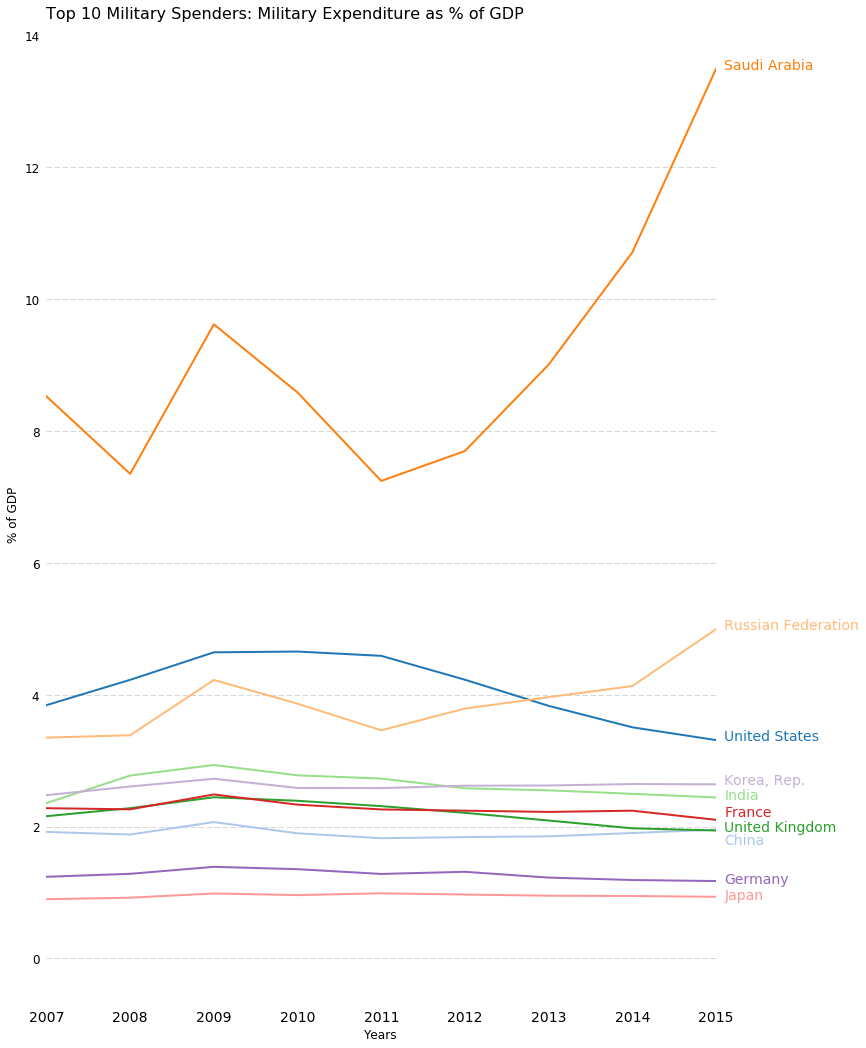

In [34]:
#2 . Plot each indicator

# colors and styling for plots found from this post -> bit.ly/1uBkJI5

# tableau20 colors for plots, first generating the rgb values and then dividing them by 
# the (256 - 1) limit
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

for i in range(len(tableau20)):
    r,g,b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)

# military expenditure as % of GDP

# set the figure size and save plot axis object to ax
pp.figure(figsize=(12,18))
ax = pp.subplot(111)
# remove outer lines of axis
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
# only draw ticks on left for y and bottom for x axis
# but note, later on these are shut off
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
# set the x limit for the x axis
pp.xlim(2007,2015)
# manually set y axis tick marks to the range 0,14, with steps by 2
ax.yaxis.set_major_formatter(mtick.FixedFormatter([0,0,2,4,6,8,10,12,14]))
# set the font size for both
pp.yticks(fontsize=12)
pp.xticks(fontsize=14)
# add a dashed line at height equal to y axis tick marks
for y in [y * 0.01 for y in range(0,14,2)]:
    pp.plot(range(2007, 2016), [y] * len(range(2007, 2016)), "--", lw=0.5, color="black", alpha=0.3)    
# remove unwanted tick labels using tick_params
# axis and which both makes sure both y and x axis can be controlled
# top, left, and right off set ticks as off
# labelbottom and labelleft as on make sure the tick labels are drawn
pp.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")  

# for each country in dataframe do the following to plot it
for i in range(0,len(miliDataList[3].index.values.tolist())):
    # Select country matching ith element in index list
    country = miliDataList[3].index.values.tolist()[i]
    # Plot row of datframe for country held in country variable
    # set the width of that country's line
    # set its color to the ith color in the tableau20 list
    pp.plot(miliDataList[3].loc[country],
           lw=2,color=tableau20[i])
    # Set y position of label to hieght of current country's 
    # 2015 Military expenditure as % of GDP
    y_pos = miliDataList[3].loc[country,'2015']
    # slightly adjust these label heights as needed so labels do not clash
    if country == 'India':
        y_pos -= 0.0002
    elif country == 'United Kingdom':
        y_pos -= 0.0001
    elif country == 'China':
        y_pos -= 0.0022  
    elif country == 'France':
        y_pos += 0.0005
    elif country == 'Brazil' or country == 'Germany' or country == 'Japan':
        y_pos -= 0.0003
    # plot the text
    pp.text(2015.1,y_pos,country,fontsize=14,color=tableau20[i])
    
# plot the y-axis label and the title
pp.ylabel('% of GDP',size=12)
pp.xlabel('Years', size=12)
pp.title('Top 10 Military Spenders: Military Expenditure as % of GDP',
         fontsize=16,loc='left')

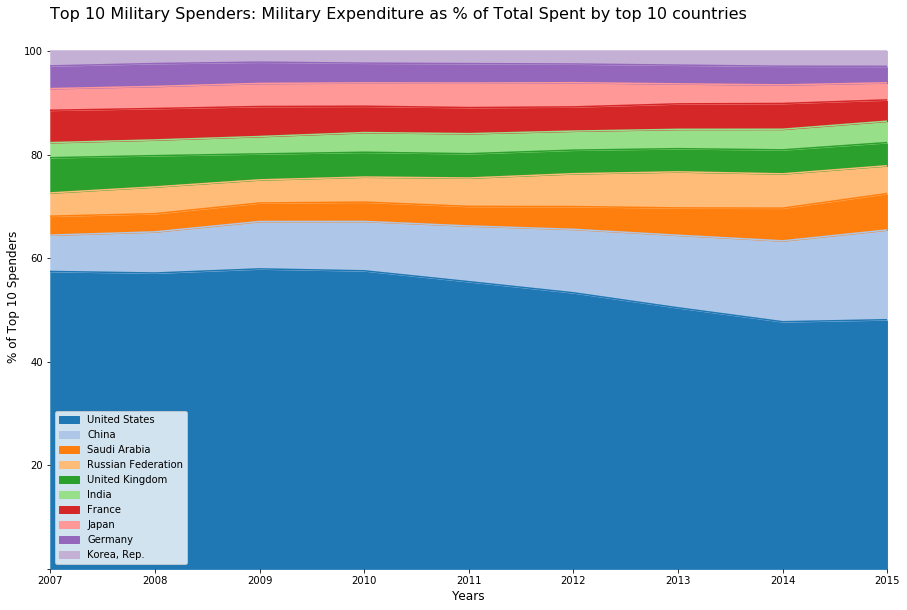

In [25]:
# military spending compared to total spending of all other countries

# use pandas area plot method to make stacked area plot
miliDataList[4].T.plot.area(figsize=(15,10),
                            color=tableau20)

# get axis object, then remove unwanted borders
ax = pp.subplot(111)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.yaxis.set_major_formatter(mtick.FixedFormatter(["",20,40,60,80,100]))

# add title and y axis label
pp.ylabel('% of Top 10 Spenders',size=12)
pp.xlabel('Years', size=12)
pp.title("Top 10 Military Spenders: Military Expenditure as % of Total Spent by top 10 countries",
         fontsize=16,loc='left')


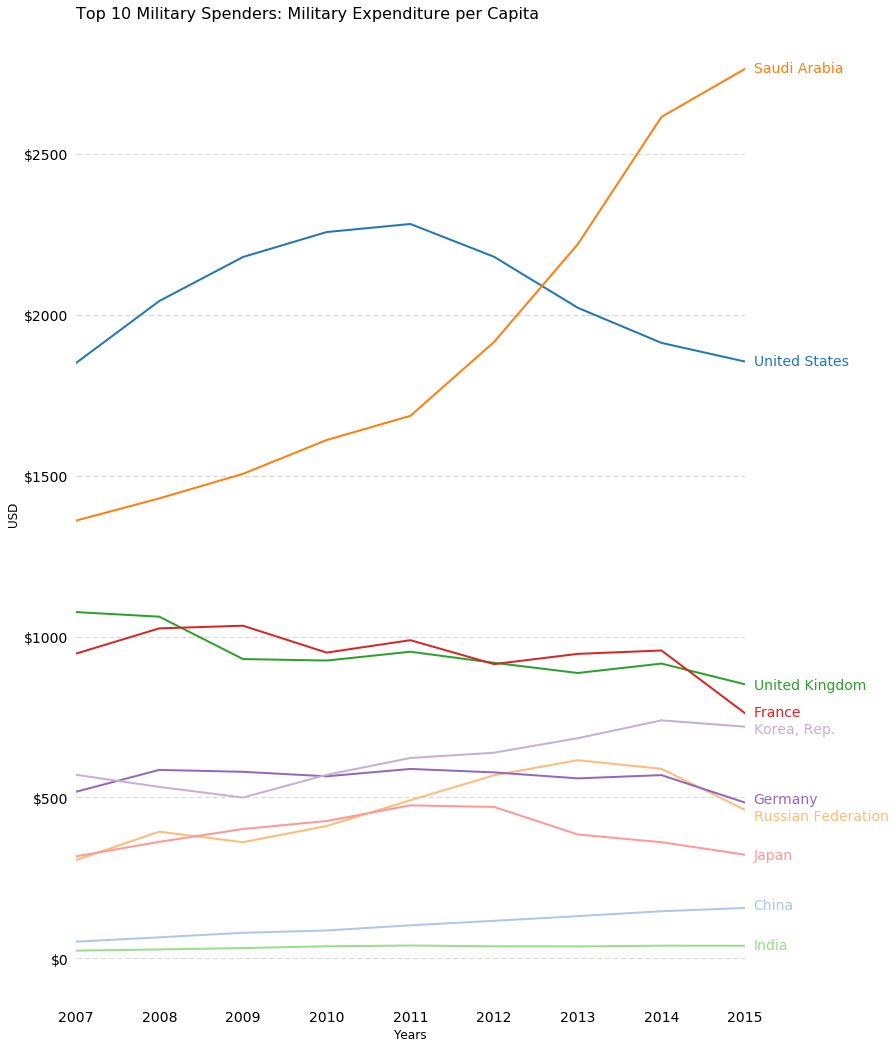

In [33]:
# per person military spending v. per person gdp

# set figure size and get axis object from tuple holding it
pp.figure(figsize=(12,18))
ax = pp.subplot(111)
# remove outer lines of plot
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
# only draw ticks on left for y and bottom for x axis
# but note, later on these are shut off
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()    
# set limit for x axis as the range from 2007 to 2015
pp.xlim(2007,2015)
# set y ticks as range 0 to $3000, with tick at every 500 dolllars
pp.yticks(range(0,3000,500), 
          ["$" + str(x) for x in range(0,3000,500)], 
          fontsize=14)    
# set font size of x ticks
pp.xticks(fontsize=14)
# again, plot a dashed line at height of each tick mark
for y in [y for y in range(0,3000,500)]:
    pp.plot(range(2007, 2016), [y] * len(range(2007, 2016)), "--", lw=0.5, color="black", alpha=0.3)    

# remove top,bottomm,left,rigth ticks, but keep on the labels
pp.tick_params(axis="both", which="both", bottom="off", top="off",    
               labelbottom="on", left="off", right="off", labelleft="on")  

# plot each country's  military spending per capital, using the same sequence of actions as in the 
# military expenditure as percent of gdp plot
for i in range(0,len(miliDataList[5].index.values.tolist())):
    
    # Select country matching ith element in index list
    country = miliDataList[5].index.values.tolist()[i]
    # Plot each line separately with its own color, using the Tableau 20 color set in order.    
    pp.plot(miliDataList[5].loc[country],
           lw=2,color=tableau20[i])
    # Set y position of label to value of 2015 milispending
    y_pos = miliDataList[5].loc[country,'2015']
    # after visual inspection, slightly adjust height of text
    if country == 'India':
        y_pos -= 12
    elif country == 'Russian Federation':
        y_pos -= 30
    elif country == 'Germany':
        y_pos -= 3
    elif country == 'China':
        y_pos -= 5
    elif country == 'Japan':
        y_pos -= 13
    elif country == 'Brazil':
        y_pos -= 20
    elif country == 'Korea, Rep.':
        y_pos -= 20
    elif country == 'France':
        y_pos -= 10
    elif country == 'United Kingdom':
        y_pos -= 15
    elif country == 'United States':
        y_pos -= 10
    elif country == 'Saudi Arabia':
        y_pos -= 10
    # plot the text
    pp.text(2015.1,y_pos,country,fontsize=14,color=tableau20[i])

# add plot labels
pp.ylabel('USD',size=12)
pp.xlabel('Years', size=12)
pp.title('Top 10 Military Spenders: Military Expenditure per Capita',
         fontsize=16,loc='left')

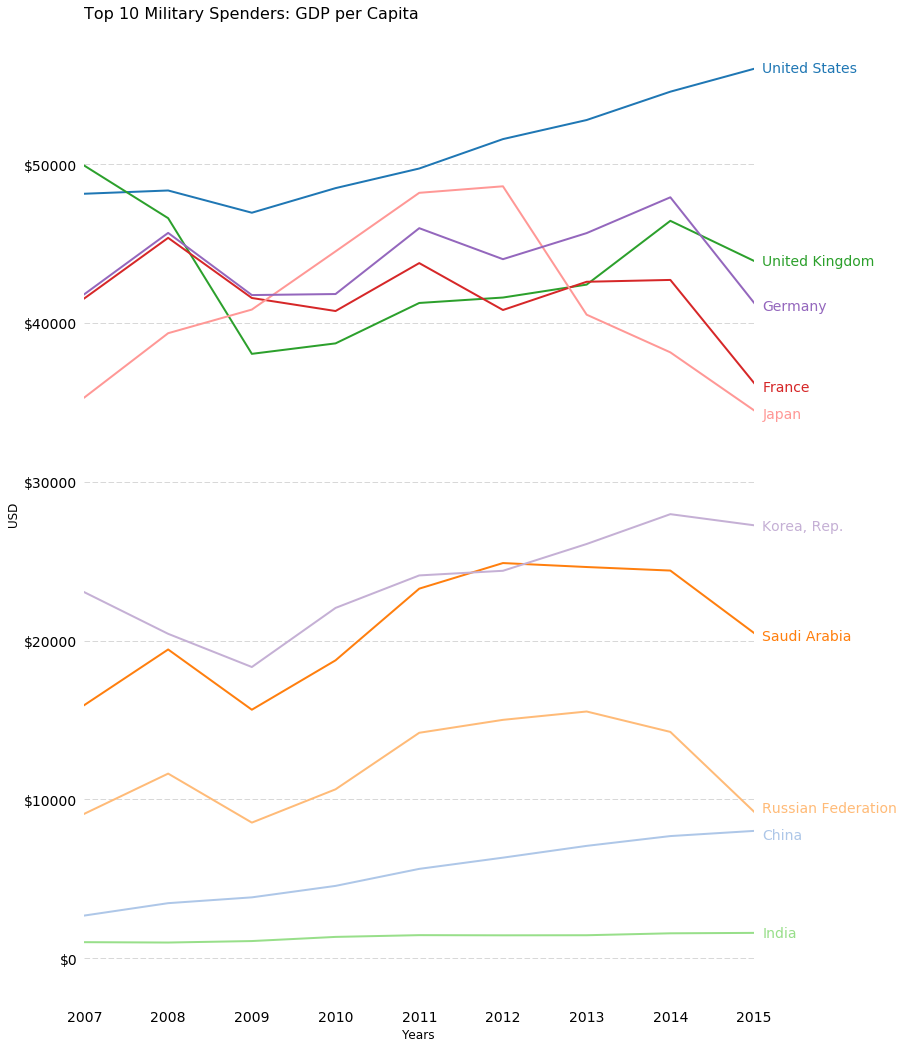

In [32]:
# per person gdp

# create a figure obj with size, and save axis obj to ax
pp.figure(figsize=(12,18))
ax = pp.subplot(111)
# remove outer lines of plot
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
# control tick drawing for only the bottom and left of the axis object
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()    
# set the x limit to between and including 2007, through 2015
pp.xlim(2007,2015)
# set the y to range 0 to $60,000 at $10,000 interval
pp.yticks(range(0,60000,10000), ["$" + str(x) for x in range(0,60000,10000)], fontsize=14) 
# set x axis tick mark fontsize
pp.xticks(fontsize=14)
# At the height of each of those $10,000 tick marks, extend a dashed line across the length of the x axis
for y in [y for y in range(0,60000,10000)]:
    pp.plot(range(2007, 2016), [y] * len(range(2007, 2016)), "--", lw=0.5, color="black", alpha=0.3)    

# remove tick marks from plot, via bottom,top,left,right set to off. But, keep left and bottom labels ON!
pp.tick_params(axis="both", which="both", bottom="off", top="off",
               labelbottom="on", left="off", right="off", labelleft="on")  

# plot each of the country's per capita gdp with sequence used for per person military expenditure and expenditure
# as percentage of total spending
for i in range(0,len(miliDataList[6].index.values.tolist())):
    # Select country matching ith element in index list
    country = miliDataList[6].index.values.tolist()[i]
    
    # Plot each line separately with its own color, using the Tableau 20 color set in order.    
    pp.plot(miliDataList[6].loc[country],
           lw=2,color=tableau20[i])
    
    # Set y position of label to value of 2015 milispending
    y_pos = miliDataList[6].loc[country,'2015']
    
    if country == 'United States':
        y_pos -= 200
    elif country == 'United Kingdom':
        y_pos -= 250
    elif country == 'Germany':
        y_pos -= 450
    elif country == 'France':
        y_pos -= 500
    elif country == 'Japan':
        y_pos -= 500
    elif country == 'Korea, Rep.':
        y_pos -= 300
    elif country == 'Saudi Arabia':
        y_pos -= 450
    elif country == 'Brazil':
        y_pos -= 170
    elif country == 'China':
        y_pos -= 500
    elif country == 'India':
        y_pos -= 250
    # plot the text
    pp.text(2015.1,y_pos,country,fontsize=14,color=tableau20[i])

pp.ylabel('USD',size=12)
pp.xlabel('Years', size=12)
pp.title('Top 10 Military Spenders: GDP per Capita',
         fontsize=16,loc='left')

In [18]:
# Generate, then plot, year of year growth in military spending from 08 to 2015

# to make this dataframe, create sub dataframes of each year's growth rate, in a for loop, and save each 
# of these dataframes to list, here called perMiliGrowth
# then, using pandas' concat function, merge these dataframes. 

perMiliGrowth = []

#caculate percentage growth in military spending for 2008 - 2015
for i in range(2007,2016):
    # when year not 2007, get growth rate for each country as a dataframe and append to perMiliGrowth
    if i > 2007:
        # get current year's year over year growth rate
        growthDF = (miliDataList[1][str(i)]-miliDataList[1][str(i-1)])/miliDataList[1][str(i-1)]
        # save it to perMiliGrowoth
        perMiliGrowth.append(pd.DataFrame(growthDF, columns=[i]))
        
#use perMiliGrowth list with pd.concat to merge each year into dataframe
perMiliGrowth = pd.concat(perMiliGrowth,axis=1)


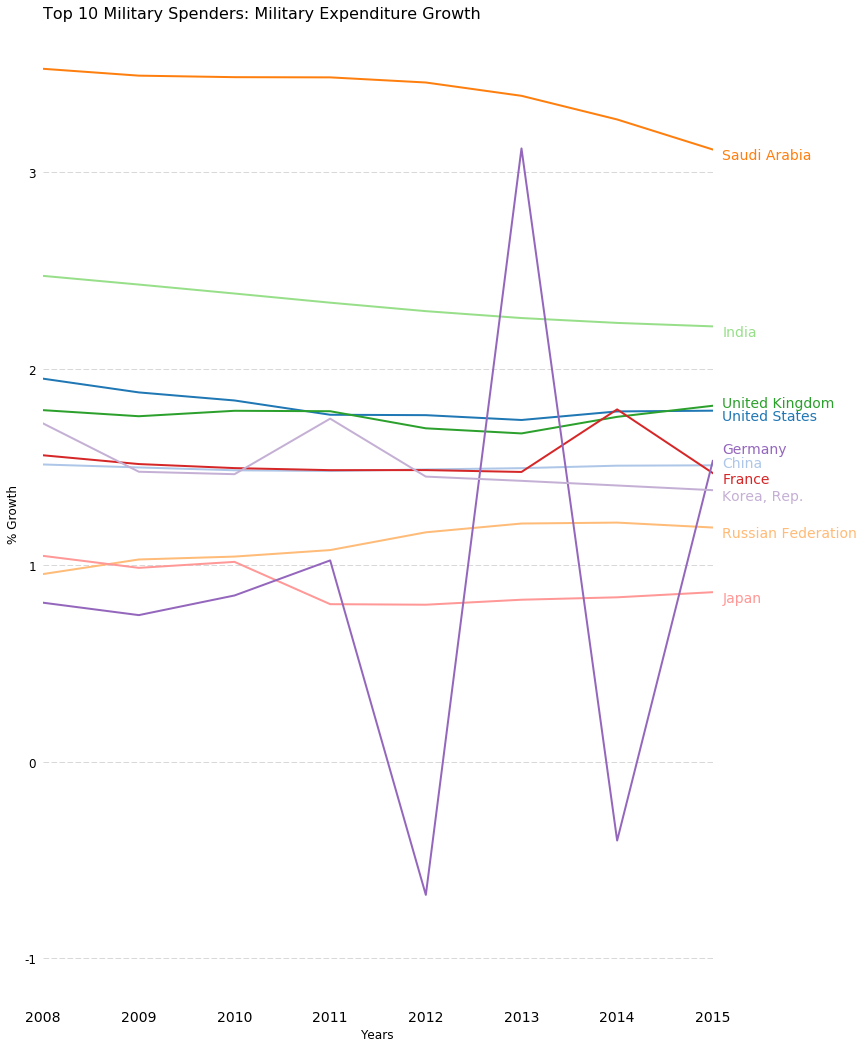

In [31]:
# plot year over year growth from 2008 to 2015

# set figure size then get axis object
pp.figure(figsize=(12,18))
ax = pp.subplot(111)
# remove outer lines of plot
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
# constrain tick mark drawing to only the y and x axes
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()  
# set x limit to years 2008-2015
pp.xlim(2008,2015)
ax.yaxis.set_major_formatter(mtick.FixedFormatter([-2,-1,0,1,2,3]))
pp.xticks(fontsize=14)
pp.yticks(fontsize=12)
# plot dashed lines at height equal to ticks on y axis
for y in  [y * 0.01 for y in range(-2,3,1)]:
    pp.plot(range(2008, 2016), [y] * len(range(2008, 2016)), "--", lw=0.5, color="black", alpha=0.3)   
# get rid of ticks, leaving only the labels
pp.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")  

for i in range(0,len(perMiliGrowth.index.values.tolist())):
    # Select country matching ith element in index list
    country = perMiliGrowth.index.values.tolist()[i]
    
    # Plot each line separately with its own color, using the Tableau 20 color set in order.    
    pp.plot(perMiliGrowth.loc[country],
           lw=2,color=tableau20[i])
    
    # Set y position of label to value of 2015 milispending
    y_pos = perMiliGrowth.loc[country,2015]
    
    if country == 'Brazil':
        y_pos += 0.0002
    elif country == 'United Kingdom':
        y_pos -= 0.00005
    elif country == 'United States':
        y_pos -= 0.0005
    elif country == 'Germany':
        y_pos += 0.0004
    elif country == 'China':
        y_pos -= 0.00008
    elif country == 'France' or 'Korea, Rep.':
        y_pos -= 0.0005
    
    pp.text(2015.1,y_pos,country,fontsize=14,color=tableau20[i])

pp.ylabel('% Growth',size=12)
pp.xlabel('Years', size=12)
pp.title('Top 10 Military Spenders: Military Expenditure Growth',
         fontsize=16,loc='left')